In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Text(0, 0.5, 'P(X = x)')

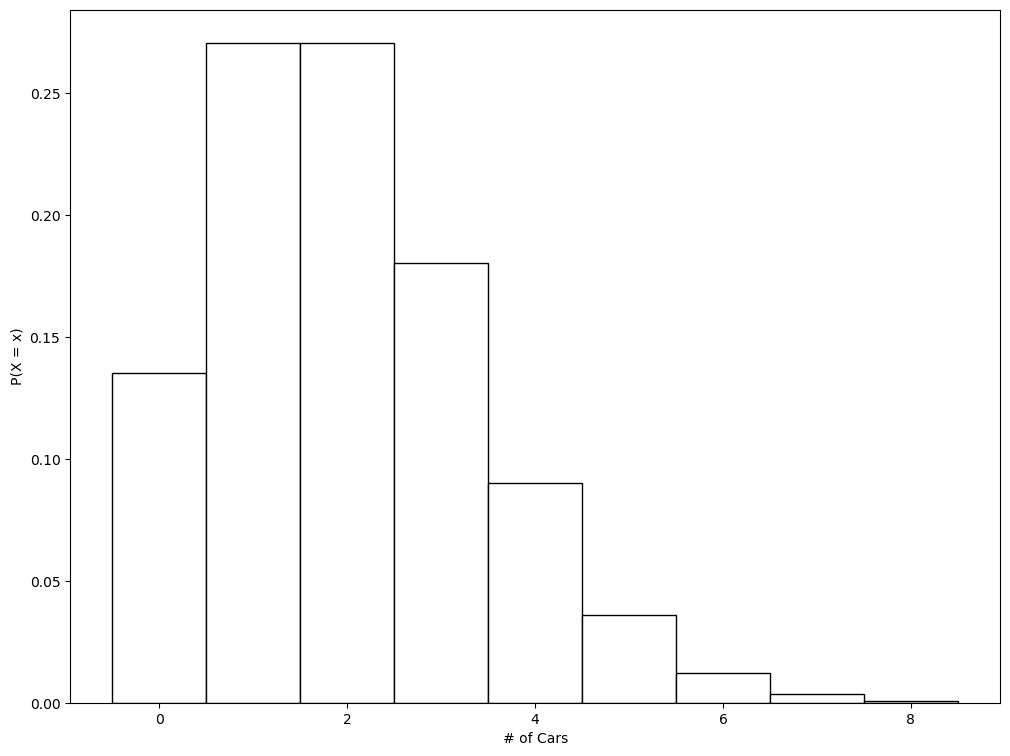

In [2]:
# 1

dist = stats.poisson(2)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
y = dist.pmf(x)

plt.bar(x, y, color='white', edgecolor='black', width=1)
plt.xlabel('# of Cars')
plt.ylabel('P(X = x)')

In [3]:
theory = dist.pmf(0)
simulated = (dist.rvs(10_000) == 0).mean()

theory, simulated

(0.1353352832366127, 0.1366)

In [4]:
theory = dist.sf(2)
simulated = (dist.rvs(10_000) >= 3).mean()

theory, simulated

(0.32332358381693654, 0.3249)

In [5]:
theory = dist.sf(0)
simulated = (dist.rvs(10_000) > 0).mean()

theory, simulated

(0.8646647167633873, 0.859)

In [6]:
# 2

gpa_sims = np.random.normal(3, .3, 10_000)

# top 5%
theory = stats.norm(3.0, .3).isf(.05)
simulated = np.percentile(gpa_sims, 95)

theory, simulated

(3.4934560880854417, 3.494936197733113)

In [7]:
theory = stats.norm(3.0, .3).ppf(.15)
simulated = np.percentile(gpa_sims, 15)

theory, simulated

(2.689069983151863, 2.6948341001105165)

In [8]:
theory = stats.norm(3.0, .3).ppf([.2, .3])
simulated = np.percentile(gpa_sims, [20, 30])

theory, simulated

(array([2.74751363, 2.84267985]), array([2.75500308, 2.84566265]))

In [9]:
theory = stats.norm(3.0, .3).cdf(3.5)
simulated = (gpa_sims <= 3.5).mean()

theory, simulated

(0.9522096477271853, 0.9519)

<BarContainer object of 100 artists>

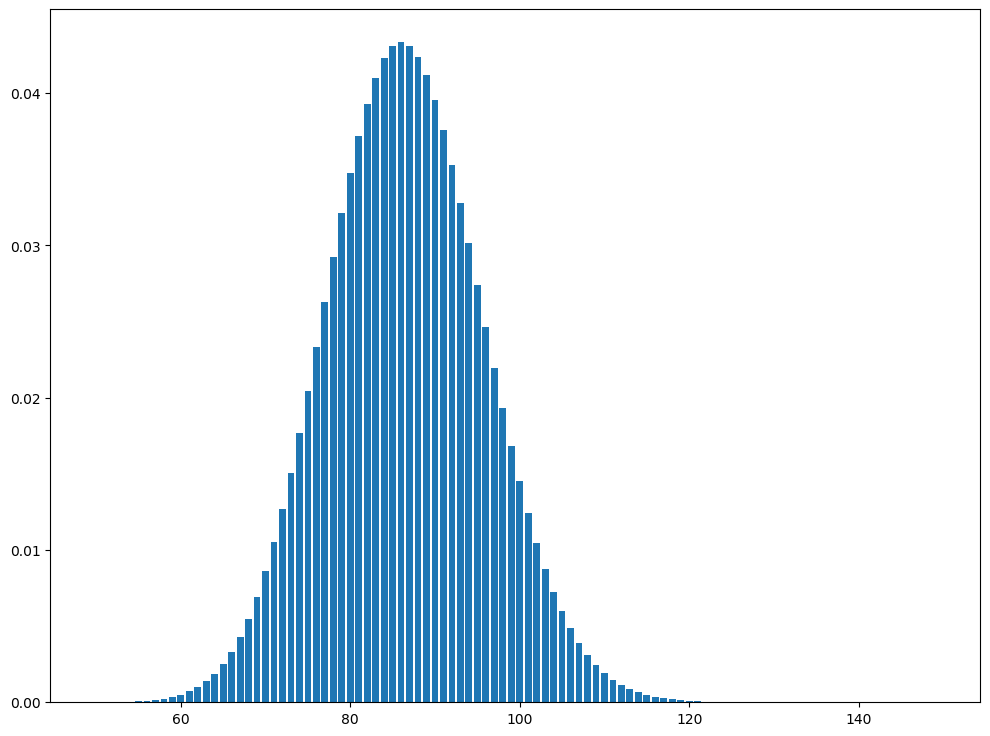

In [10]:
# 3

x = np.arange(50, 150)
y = stats.binom(4326, .02).pmf(x)

plt.bar(x, y)

In [11]:
np.random.random((10_000, 4326)) <= .02

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
(np.random.random((10_000, 4326)) <= .02).sum(axis=1)

array([87, 88, 81, ..., 83, 89, 80])

In [13]:
stats.binom(4326, .02).rvs(10_000)

array([85, 70, 86, ..., 81, 65, 92])

In [14]:
theory = stats.binom(4326, .02).sf(96)
simulated = ((np.random.random((10_000, 4326)) <= .02).sum(axis=1) >= 97).mean()

theory, simulated

(0.1397582363130086, 0.1457)

In [15]:
stats.poisson(4326 * .02).sf(96)

0.14211867659283192

In [16]:
.95, .12, .45, .16

(0.95, 0.12, 0.45, 0.16)

<BarContainer object of 5 artists>

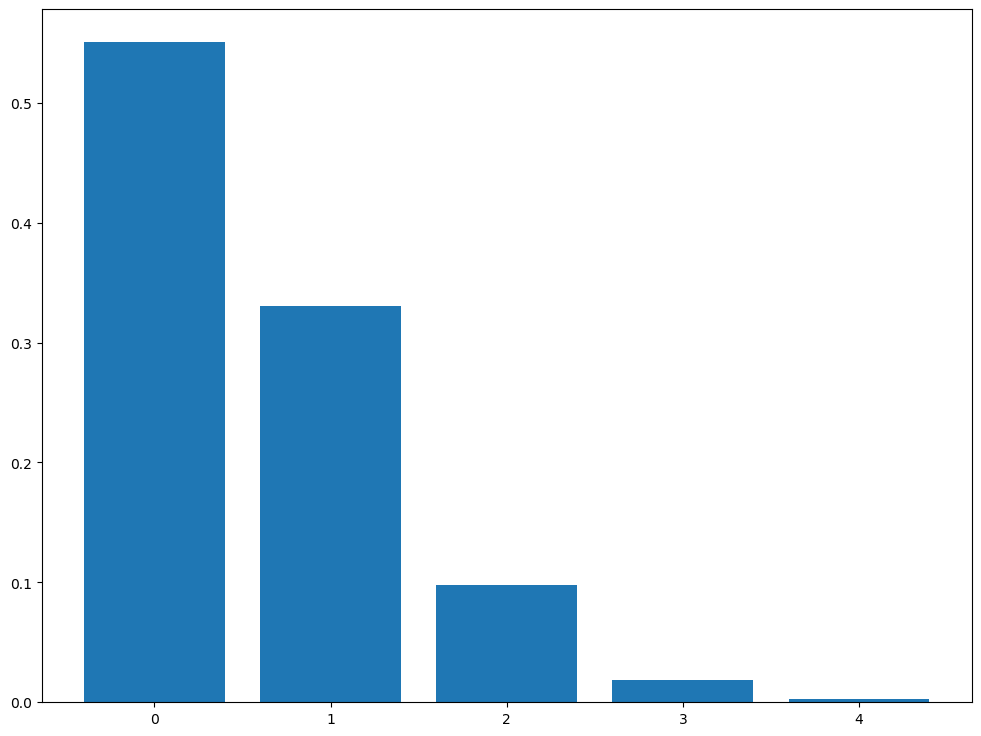

In [17]:
# 4

x = np.arange(0, 5)
y = stats.binom(60, 1 / 101).pmf(x)

plt.bar(x, y)

In [18]:
stats.binom(60, .01).sf(0)

0.4528433576092388

In [19]:
1 - stats.binom(60, .01).pmf(0)

0.45284335760923855

In [20]:
simulated = ((np.random.random((10_000, 60)) <= .01).sum(axis=1) > 0).mean()
theory = stats.binom(60, .01).sf(0)

theory, simulated

(0.4528433576092388, 0.4542)

In [21]:
# 5

n_students = round(.9 * 3 * 22)
p = .03

p_cleaned = stats.binom(n_students, p).sf(0)
p_cleaned

0.8342199288437355

In [22]:
stats.binom(n_students, p).pmf(1)

0.3025059030377137

In [23]:
n_days = 5

p_cleaned * p_cleaned * p_cleaned * p_cleaned * p_cleaned
p_cleaned ** n_days

0.404019942874891

In [24]:
stats.binom(5, p_cleaned).sf(4)

0.404019942874891

In [25]:
p_not_cleaned = 1 - p_cleaned

In [26]:
p_not_cleaned * p_not_cleaned

0.027483031992576113

In [27]:
1 - stats.binom(n_students * 2, p).sf(0)

0.02748303199257618

In [66]:
# Modeling using 1 - p, i.e. a "success" is a student *not* cleaning up the break area
# where p is the probability of cleaning up

# to calculate the probability that no one cleans up for 2 days...
# we want to know the likelihood that all of the students that visit in two days don't clean up.
# based on our definition of success, we want to know the likelihood that all the trials are successes
stats.binom(n_students * 2, 1 - p).pmf(n_students * 2)

0.027483031992576134

In [28]:
stats.binom(n_students * 2, p).pmf(0)

0.02748303199257623

In [29]:
stats.binom(n_students, p).pmf(2)

0.2713197274668193

In [42]:
# 6

# we need 10 minutes to get our order + 15 minutes to eat + 2 mins to order
# so the line can't take longer than
constant_time_to_eat = 2 + 10 + 15
constant_time_to_eat

27

In [44]:
time_for_lunch = 60
max_time_to_wait_in_line = time_for_lunch - constant_time_to_eat
max_time_to_wait_in_line

33

In [45]:
# from avg, sd # of people -> avg, sd wait time
avg_wait_time = 15 * 2 # person * time to order per person
sd = 3 * 2

stats.norm(avg_wait_time, sd).cdf(max_time_to_wait_in_line)

0.6914624612740131

In [46]:
(np.random.normal(avg_wait_time, sd, 10_000) <= 33).mean()

0.6924

In [33]:
# 7

import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = 'SELECT * FROM salaries WHERE to_date > NOW()'
salaries = pd.read_sql(query, url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [34]:
μ, σ = salaries.salary.mean(), salaries.salary.std()
dist = stats.norm(μ, σ)

dist.cdf(60_000)

0.24385742480214423

In [51]:
(salaries.salary < 60_000).mean()

0.2705727041028802

In [35]:
dist.sf(95_000)

0.09208819199804053

In [52]:
(salaries.salary > 95_000).mean()

0.1086272092752078

In [36]:
dist.cdf(80_000) - dist.cdf(65_000)

0.3350605685446666

In [54]:
a = np.array([True, False, True])
b = np.array([False, True, True])

a & b

array([False, False,  True])

In [55]:
((salaries.salary > 65_000) & (salaries.salary < 80_000)).mean()

0.325107028035515

In [47]:
dist.sf(65_000) - dist.sf(80_000)

0.3350605685446666

In [48]:
1 - (dist.sf(80_000) + dist.cdf(65_000))

0.3350605685446666

In [37]:
dist.isf(.05)

100484.64454102777

In [59]:
salaries.salary.quantile(.95)

104225.84999999998

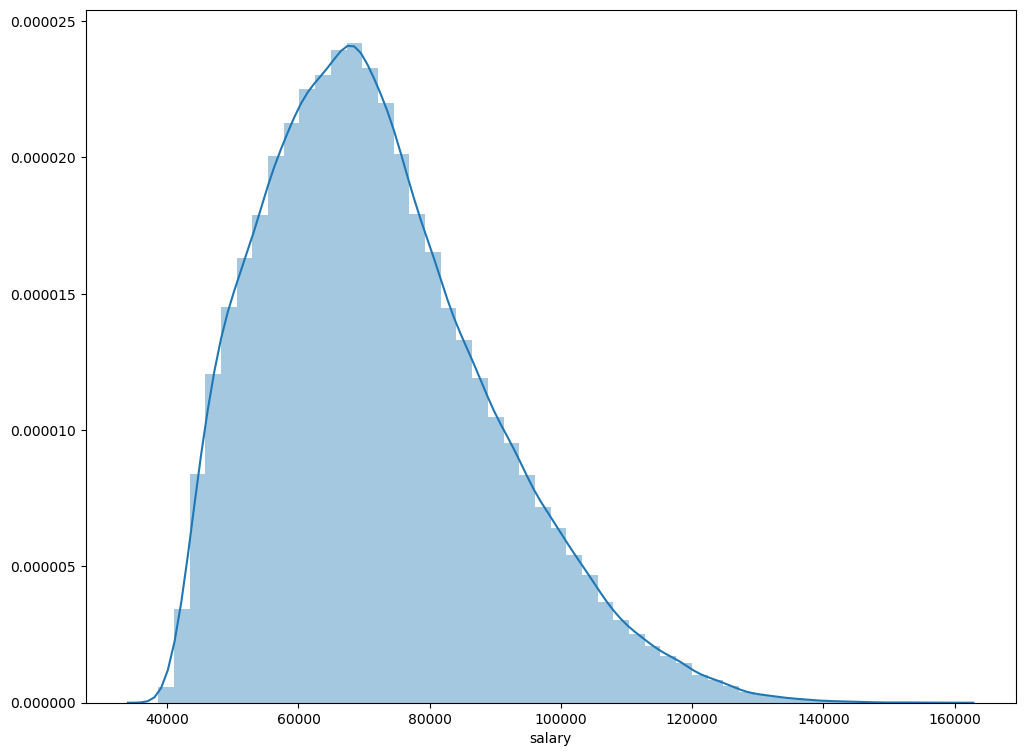

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(salaries.salary)